# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>План отчета<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Пустые-значения" data-toc-modified-id="Пустые-значения-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Пустые значения</a></span></li><li><span><a href="#Типы-данных" data-toc-modified-id="Типы-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Типы данных</a></span></li><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li><li><span><a href="#Аномалии" data-toc-modified-id="Аномалии-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Аномалии</a></span></li></ul></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу новые столбцы</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

### Знакомство с данными
Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os

In [2]:
# Загрузка данных
data = pd.read_csv('/datasets/real_estate_data.csv',sep ='\t')
print(display(data.head(2)))
data_shape_original = data.shape[0]
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_neare

In [3]:
## Не получилось в эту схему корректно вписать sep ='\t' :(
# pth1 = 'real_estate_data.csv'
# pth2 = '/datasets/real_estate_data.csv'

# if os.path.exists(pth1):
#     data = pd.read_csv(pth1)
# elif os.path.exists(pth2):
#     data = pd.read_csv(pth2)
# else:
#     print('Something is wrong')

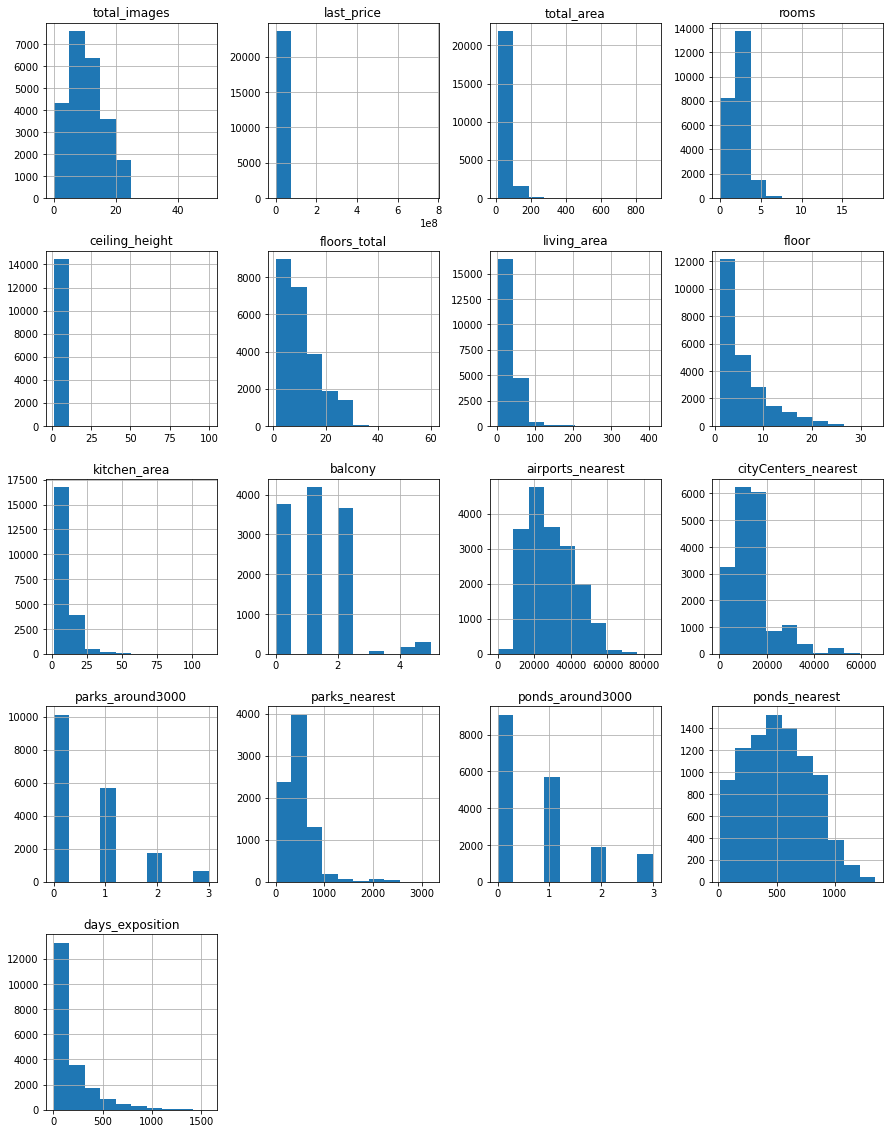

In [4]:
# общая гистограмма для всех числовых столбцов
data.hist(figsize=(15, 20));

### Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

В датасете объявлений о продаже квартир представлено 23699 объявлений. Посмотрев информацию о датасете, можно сразу отметить показатели без пустот (где количество строк == 23699): total_images, last_price, first_day_exposition, rooms, floor, studio, open_plan. В других столбцах есть пропуски. Некоторые имеют незначительное кол-во пропусков, например floors_total и locality_name. Можно предположить, что эти пропуски были допущены клиентом при публикации объявлений. Другие мы рассмотрим более подробно в следующем этапе построения отчета.

### Предобработка данных

#### Пустые значения

In [5]:
### Поиск пустых значений
#функция, которая покажет долю пустых значений в столбце
def get_nan_ratio(df : 'DataFrame') -> 'DataFrame':
    length = df.shape[0]
    ratios = []
    for col in df.columns:
        nan_ratio = 100 * (1 - df[col].count() / length)
        ratios.append(nan_ratio)
    stat_df = pd.DataFrame()
    stat_df['Column'] = df.columns
    stat_df['NaN_ratio_prc'] = ratios
    stat_df['NaN_ratio_prc'] = stat_df['NaN_ratio_prc'].round(2)
    result = stat_df.sort_values(by = ['NaN_ratio_prc'], ascending = False)
    return result

nan = get_nan_ratio(data)
nan = nan[nan['NaN_ratio_prc']>0]
print(nan)
print(' ')
print('Список колонок, где есть пропуски:', nan['Column'].unique())

                 Column  NaN_ratio_prc
9          is_apartment          88.29
18        parks_nearest          65.91
20        ponds_nearest          61.56
13              balcony          48.61
5        ceiling_height          38.80
15     airports_nearest          23.38
16  cityCenters_nearest          23.29
19     ponds_around3000          23.28
17     parks_around3000          23.28
21      days_exposition          13.42
12         kitchen_area           9.61
7           living_area           8.03
6          floors_total           0.36
14        locality_name           0.21
 
Список колонок, где есть пропуски: ['is_apartment' 'parks_nearest' 'ponds_nearest' 'balcony' 'ceiling_height'
 'airports_nearest' 'cityCenters_nearest' 'ponds_around3000'
 'parks_around3000' 'days_exposition' 'kitchen_area' 'living_area'
 'floors_total' 'locality_name']


In [6]:
# Пустые значения
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.8
floors_total,0.4
living_area,8.0
floor,0.0
is_apartment,88.3


In [7]:
### Убираем пустые значения

# Меняем пустые значения у balcony на 0
data.loc[data['balcony'].isna(), 'balcony'] = 0

# старый вариант. Ищем площади kitchen_area и living_area, вычитая их из total
#data.loc[(data['kitchen_area'].isna())&(~data['living_area'].isna()), 'kitchen_area'] = data['total_area']-data['living_area']
#data.loc[(data['living_area'].isna())&(~data['kitchen_area'].isna()), 'living_area'] = data['total_area']-data['kitchen_area']

# Меняем пустые значения living_area с помощью расчитанного коэффициента
k_living = data['total_area'].mean()/data['living_area'].mean()
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area']/k_living

# Меняем пустые значения kitchen_area с помощью расчитанного коэффициента
not_living_area = data['total_area'] - data['living_area']
k_kitchen = not_living_area/data['kitchen_area']
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area']/k_kitchen

# Меняем пустые значения у floors_total на floors
data.loc[data['floors_total'].isna(), 'floors_total'] = data['floor']

#удаляем строки с пустыми locality_name
data=data.dropna(subset=['locality_name'])

# Меняем пустые значения кол-во парков и водоемов на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

* У is_apartment слишком много пропусков вместо значений True/False (возможно пользователи не проставили нужные значения в необязательном поле), просто подставить True будет не верно
* Растояние до ближайшего парка parks_nearest, растояние до водоема ponds_nearest, растояние до аэропорта airports_nearest и до центра города cityCenters_nearest индивидуальны, заменить усредненным или медианным значением будет не верно. Это картографические данные, которые можно отправить разработчикам на доработку.
* Пустые значения кол-ва парков parks_around3000 и кол-ва водоемов ponds_around3000 можно предположить, что они равны 0.
* В показателе числа балконов balcony предположим, что пустые значения означают отсутсвие балконов. Пользоатели забыли указать параметр.
* Высота потолков ceiling_height также индивидуальна, заменить медианой будет не верно
* days_exposition мы могли бы расчитать, но у нас есть данные о дате публикации, но нет данных о дате снятия. Можно запросить колонку о дате снятия с публикации и заполнить пропуски. Или же объявление не было снято.
* ~~Пропуски в kitchen_area и living_area также нельзя заменить просто расчитанными показателями. Однако у нас есть столбец total_area с общей площадью квартиры. И можно попробовать вычесть значения area из тотал~~
* Пропуски в living_area посчитаем разделив общую площадь на коэффициент (среднее значение общей площади на среднее значение из имеющихся данных по жилой площади).
* Для замены пропусков в kitchen_area  найдем коэффициент соотношения нежилой площади к площади кухни. Нежилая площадь – это площадь общая без площади жилой (в нее входит кухня, санузлы, коридоры и кладовки)
* Всего этажей в доме floors_total, можно предположить, что floors_total == floors. Здесь наверняка есть погрешность, но пустых значений не так много, можно допустить.
* Пропусков locality_name всего 49, их можно удалить из датасета

#### Типы данных

In [8]:
### Менняем типы данных на более подходящие
data['floors_total'] = data['floors_total'].astype(int) #кол-во этажей это целое число
data['is_apartment'] = data['is_apartment'].astype(bool) #тут булевой тип данных
data['balcony'] = data['balcony'].astype(int) #кол-во балконов это целое число
data['last_price'] = data['last_price'].astype(int) #цена более читабельна в int формате
data['parks_around3000'] = data['parks_around3000'].astype(int) #кол-во парков это целые числа
data['ponds_around3000'] = data['ponds_around3000'].astype(int) #кол-во водоемов это целые числа

#### Поиск дубликатов

In [9]:
### Поиск неявных дубликатов в названии населенных пунктов
print('Кол-во названий до обработки', data['locality_name'].nunique())
data['locality_name'] = data['locality_name'] .replace('поселок городского типа Рябово', 'поселок Рябово')
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции', 'станции')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')
print('Кол-во названий после обработки',data['locality_name'].nunique())
#data['locality_name'].unique()

Кол-во названий до обработки 364
Кол-во названий после обработки 321


#### Аномалии

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,14490.000000,23650.000000,23650.000000,23650.000000,21381.000000,23650.000000,18116.000000,18139.000000,23650.000000,8064.000000,23650.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.771287,10.673784,34.582279,5.893277,10.566403,0.591712,28803.225878,14197.860742,0.469091,490.830729,0.590359,518.059879,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,1.261593,6.593455,22.359584,4.883317,5.901753,0.959662,12637.314144,8606.830295,0.748458,342.554386,0.883539,277.841733,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26756.500000,13105.000000,0.000000,454.500000,0.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.800000,16.000000,42.100000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


До обработки None
 
ceiling_height 0.99 квантиль: 3.8211000000000057
rooms 0.99 квантиль: 5.0
days_exposition 0.95 квантиль: 643.0
total_area 0.99 квантиль: 167.38000000000028
living_area 0.99 квантиль: 91.0
kitchen_area 0.99 квантиль: 31.433599999999966


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,21864.000000,2.186400e+04,21864.000000,21864.000000,13290.000000,21864.000000,21864.000000,21864.000000,19746.000000,21864.000000,16613.000000,16633.000000,21864.000000,7237.000000,21864.000000,8178.000000,18845.000000
mean,9.870792,5.700319e+06,56.565377,1.993597,2.704919,10.790843,32.316138,5.938163,10.093419,0.600576,28934.481912,14526.249805,0.448180,491.533094,0.566548,525.842504,137.941576
std,5.652964,4.655445e+06,23.698467,0.938270,0.240915,6.620192,15.309718,4.906361,4.496992,0.962662,12819.286684,8505.173960,0.727945,340.473376,0.863643,276.559863,136.251751
min,0.000000,4.300000e+05,20.000000,0.000000,2.000000,1.000000,10.000000,1.000000,4.000000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.842329,2.000000,7.000000,0.000000,18398.000000,9877.000000,0.000000,288.000000,0.000000,303.000000,42.000000
50%,9.000000,4.550000e+06,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,27102.000000,13285.000000,0.000000,456.000000,0.000000,512.000000,88.000000
75%,14.000000,6.500000e+06,67.000000,3.000000,2.800000,16.000000,41.000000,8.000000,11.600000,1.000000,37434.000000,16453.000000,1.000000,613.000000,1.000000,736.000000,192.000000
max,50.000000,9.800000e+07,200.000000,5.000000,4.000000,60.000000,100.000000,33.000000,40.000000,5.000000,84853.000000,65952.000000,3.000000,3190.000000,3.000000,1344.000000,600.000000


После обработки None


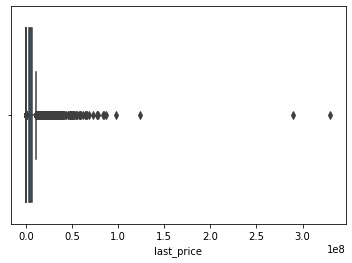

In [10]:
### Находим и устраняем аномалии в данных

# посмотрим, в каких колонках есть сликшом высокие максимальные значения
print('До обработки',display(data.describe()))
print(' ')
# изучим подробнее каждый, заинтересованный нас столбец

## Аномальные значения высот потолка (м)
sn.boxplot(x = data['ceiling_height'])
print('ceiling_height 0.99 квантиль:', data['ceiling_height'].quantile(0.99)) #в качестве аномалий нам будут интеерсны значения выше этого числа
# Значения высоты потолка >15 уменьшим в 10 раз, предположив,что значения были записаны в см (вместо м)
data.loc[data['ceiling_height']>15, 'ceiling_height'] = data['ceiling_height']/10
# Осталось 53 значения больше 4. Предположим, что это выбросы и удалим эти строки из датасета
data[data['ceiling_height']>4] # посмотрели какие строки убираем
data = data.loc[(~(data['ceiling_height'] > 4))&(~(data['ceiling_height'] < 2))] #убрали потолок выше 4 м и ниже 2 м

## Аномальные значения кол-ва комнат
sn.boxplot(x = data['rooms'])
print('rooms 0.99 квантиль:', data['rooms'].quantile(0.99))
#оставим строки, где меньше 6 комнат
data=data[data.rooms<6]

## Аномальные значения кол-ва дней в публикации объявлений
sn.boxplot(x = data['days_exposition'])
print('days_exposition 0.95 квантиль:', data['days_exposition'].quantile(0.95))
data = data.loc[~(data['days_exposition'] > 600)] #убрали обьявления. которые висели дольше 600 дней

## Аномальные значения площадей квартиры в квадратных метрах (м²)
sn.boxplot(x = data['total_area'])
sn.boxplot(x = data['living_area'])
sn.boxplot(x = data['kitchen_area'])
print('total_area 0.99 квантиль:', data['total_area'].quantile(0.99))
data = data.loc[(~(data['total_area'] > 200))&(~(data['total_area'] < 20))] 
print('living_area 0.99 квантиль:', data['living_area'].quantile(0.99))
data = data.loc[(~(data['living_area'] > 100))&(~(data['living_area'] < 10))] 
print('kitchen_area 0.99 квантиль:', data['kitchen_area'].quantile(0.99))
data = data.loc[(~(data['kitchen_area'] > 40))&(~(data['kitchen_area'] < 4))] 

## Аномальные значения цены
sn.boxplot(x = data['last_price'])
data = data.loc[(~(data['last_price'] > 100000000))]
## удаляем дубликаты
data = data.drop_duplicates().reset_index(drop=True)

print('После обработки',display(data.describe()))

In [11]:
# Процент удаленных данных
print('% удаленных строк:', round((1-data.shape[0]/data_shape_original)*100))

% удаленных строк: 8


После поиска аномалий и удалений выбросов было отфильтровано 8% данных. Данное значение допустимо при анализе.

### Посчитайте и добавьте в таблицу новые столбцы

In [12]:
#цена одного квадратного метра
data['price_per_metr'] = round(data['last_price']/data['total_area'])

#день недели публикации объявления
#data['week_day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['day_name'] = pd.DatetimeIndex(data['first_day_exposition']).day_name()

#месяц публикации объявления
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

#год публикации объявления
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year


#тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    #категоризуем этажи с помощью функции  
data['floor_type'] = data.apply(floor_type, axis = 1)


#расстояние до центра города в километрах
data['cityCenter'] = round(data['cityCenters_nearest']/1000)

In [13]:
data.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day_name,month,year,floor_type,cityCenter
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.7,16,51.0,8,True,...,482.0,2,755.0,NaN,120370.0,Thursday,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,True,...,NaN,0,NaN,81.0,82921.0,Tuesday,12,2018,первый,19.0


### Проведите исследовательский анализ данных

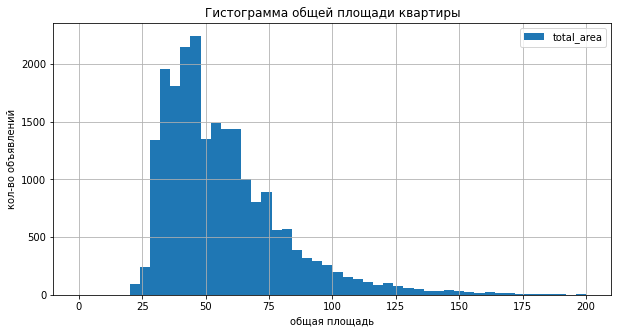

count    21864.000000
mean        56.565377
std         23.698467
min         20.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        200.000000
Name: total_area, dtype: float64


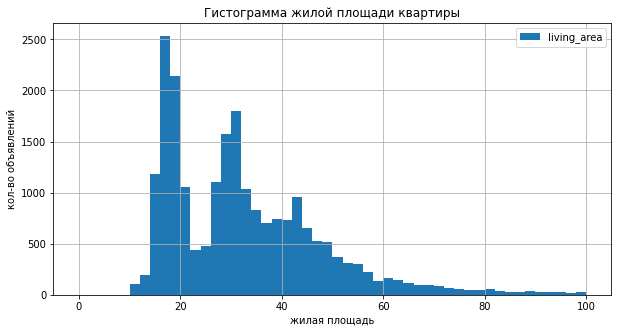

count    21864.000000
mean        32.316138
std         15.309718
min         10.000000
25%         18.842329
50%         30.000000
75%         41.000000
max        100.000000
Name: living_area, dtype: float64


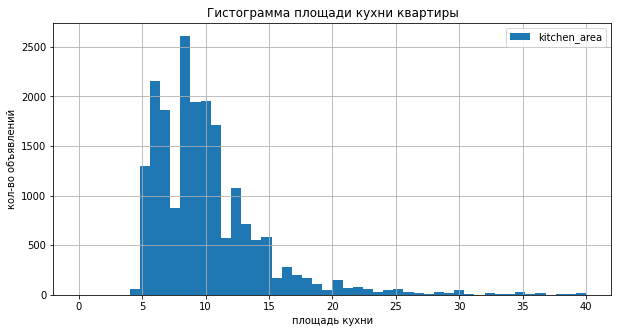

count    19746.000000
mean        10.093419
std          4.496992
min          4.000000
25%          7.000000
50%          9.000000
75%         11.600000
max         40.000000
Name: kitchen_area, dtype: float64


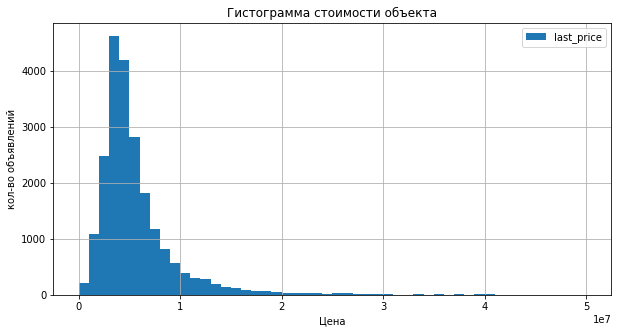

count    2.186400e+04
mean     5.700319e+06
std      4.655445e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      9.800000e+07
Name: last_price, dtype: float64


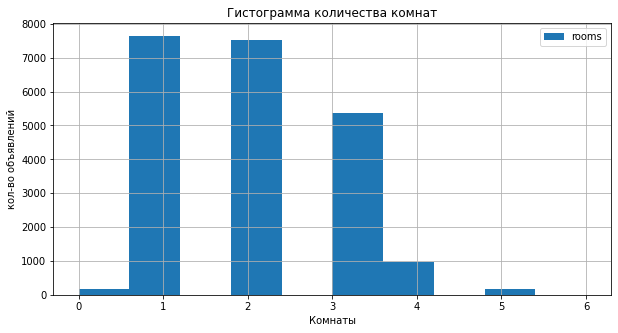

count    21864.000000
mean         1.993597
std          0.938270
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64


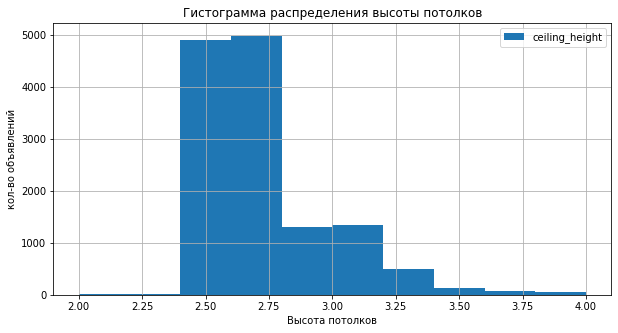

count    13290.000000
mean         2.704919
std          0.240915
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64


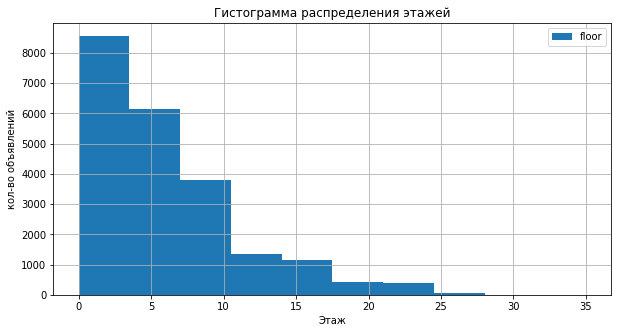

count    21864.000000
mean         5.938163
std          4.906361
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


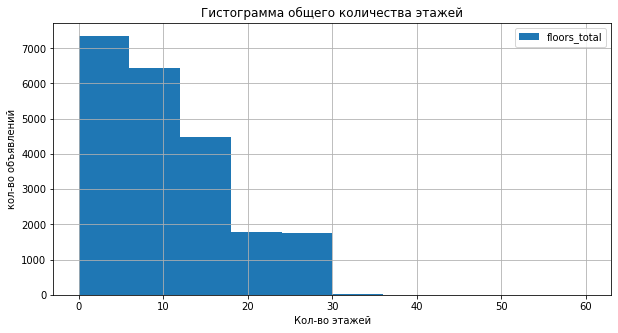

count    21864.000000
mean        10.790843
std          6.620192
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


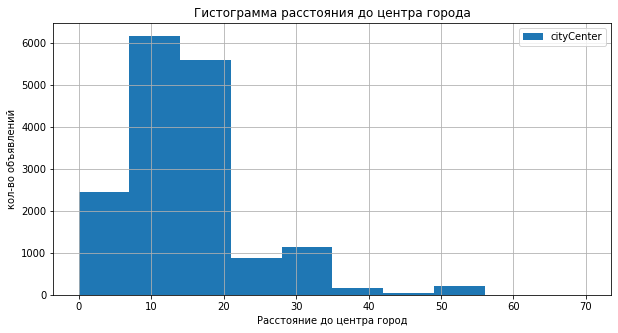

count    16633.000000
mean        14.519389
std          8.511988
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenter, dtype: float64


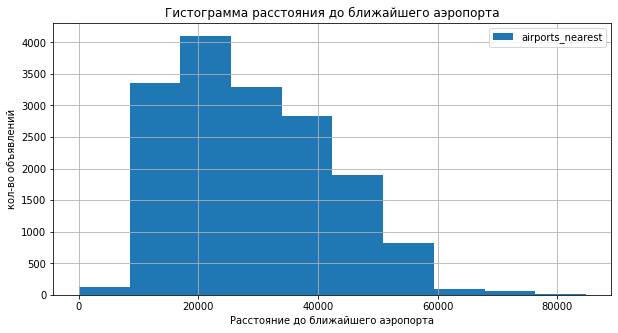

count    16613.000000
mean     28934.481912
std      12819.286684
min          0.000000
25%      18398.000000
50%      27102.000000
75%      37434.000000
max      84853.000000
Name: airports_nearest, dtype: float64


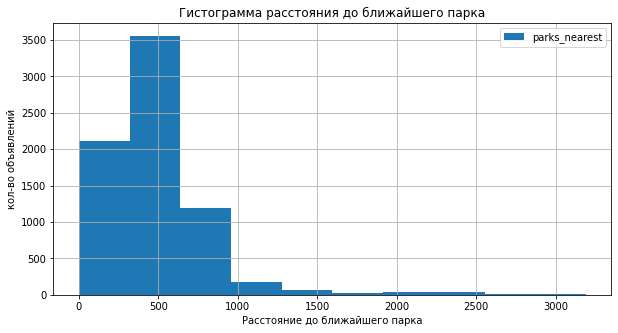

count    7237.000000
mean      491.533094
std       340.473376
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [14]:
# Гистограмма для общей площади квартиры
data.plot(y ='total_area', kind = 'hist', bins = 50, grid=True, figsize = (10,5), range = (0,200))
plt.ylabel('кол-во объявлений')
plt.xlabel('общая площадь')
plt.title('Гистограмма общей площади квартиры')
plt.show()
print(data['total_area'].describe())

# Гистограмма для жилой площади квартиры
data.plot(y ='living_area', kind = 'hist', bins = 50, grid=True, figsize = (10,5), range = (0,100))
plt.ylabel('кол-во объявлений')
plt.xlabel('жилая площадь')
plt.title('Гистограмма жилой площади квартиры')
plt.show()
print(data['living_area'].describe())

# Гистограмма для площади кухни квартиры
data.plot(y ='kitchen_area', kind = 'hist', bins = 50, grid=True, figsize = (10,5), range = (0,40))
plt.ylabel('кол-во объявлений')
plt.xlabel('площадь кухни')
plt.title('Гистограмма площади кухни квартиры')
plt.show()
print(data['kitchen_area'].describe())

# Гистограмма для цены объекта
data.plot(y ='last_price', kind = 'hist', bins = 50, grid=True, figsize = (10,5),range = (0,50000000))
plt.ylabel('кол-во объявлений')
plt.xlabel('Цена')
plt.title('Гистограмма стоимости объекта')
plt.show()
print(data['last_price'].describe())

# Гистограмма для количества комнат
data.plot(y ='rooms', kind = 'hist', grid=True, figsize = (10,5),range = (0,6))
plt.ylabel('кол-во объявлений')
plt.xlabel('Комнаты')
plt.title('Гистограмма количества комнат')
plt.show()
print(data['rooms'].describe())

# Гистограмма для высоты потолков 
data.plot(y ='ceiling_height', kind = 'hist', grid=True, figsize = (10,5),range = (2,4))
plt.ylabel('кол-во объявлений')
plt.xlabel('Высота потолков')
plt.title('Гистограмма распределения высоты потолков')
plt.show()
print(data['ceiling_height'].describe())

# Гистограмма для этажей квартир
data.plot(y ='floor', kind = 'hist', grid=True, figsize = (10,5),range = (0,35))
plt.ylabel('кол-во объявлений')
plt.xlabel('Этаж')
plt.title('Гистограмма распределения этажей')
plt.show()
print(data['floor'].describe())

# Гистограмма для общего количества этажей в доме
data.plot(y ='floors_total', kind = 'hist', grid=True, figsize = (10,5),range = (0,60))
plt.ylabel('кол-во объявлений')
plt.xlabel('Кол-во этажей')
plt.title('Гистограмма общего количества этажей')
plt.show()
print(data['floors_total'].describe())

# Гистограмма расстояния до центра города
data.plot(y ='cityCenter', kind = 'hist', grid=True, figsize = (10,5),range = (0,70))
plt.ylabel('кол-во объявлений')
plt.xlabel('Расстояние до центра город')
plt.title('Гистограмма расстояния до центра города')
plt.show()
print(data['cityCenter'].describe())

# Гистограмма для расстояние до ближайшего аэропорта
data.plot(y ='airports_nearest', kind = 'hist', grid=True, figsize = (10,5))
plt.ylabel('кол-во объявлений')
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.title('Гистограмма расстояния до ближайшего аэропорта')
plt.show()
print(data['airports_nearest'].describe())

# Гистограмма для расстояние до ближайшего парка
data.plot(y ='parks_nearest', kind = 'hist', grid=True, figsize = (10,5))
plt.ylabel('кол-во объявлений')
plt.xlabel('Расстояние до ближайшего парка')
plt.title('Гистограмма расстояния до ближайшего парка')
plt.show()
print(data['parks_nearest'].describe())

Общая площадь объектов варируется от 20 до 200 квадратных метров, однако основная часть объявлений имеет размеры площади от 25 до 60. Больше всего объявлений имеет общую площадь равную 50 квадратов.
Жилая площадь квартир равная 18 квадратов чаще всречается в объявлениях. Средняя площадь всех объявлений составила 32,4 квадратов.
Площадь кухни имеет размер от 5 до 40 квадратов, 10 квадратов в среднем и около 8 чаще всего.

Цена объекта имеет неравномерное распределение. Среднее значение выше медианы.

Среди объявлений чаще встречаются однокомнатные и двухкомнатные объекты, трехкомнатные также занимают большую часть (около 5000 объявлений)

Высота потолков в объявлениях чаще всего встречалась 2,5 и 2,75 м, что является стандартными высотами потолков в российских объектах жилья.

Максимальное этажей среди исследованных объвялений было 33 этажа. Большая часть объявлений приходится на 1-7 этажей.
Что косается общего количества этажей в доме: часто встречаются девяти и десятиэтажные здания. Менее распространены высотные здания с этажами больше 20-ти.

Изучая расстояния до центра города в км, половина объявлений имеет менее 13 км до центра. 66 км- самое большое растояние от объекта до центра.
Расстояния до аэпорпорта намного больше растояня до центра: среднее здесь около 30 км, а чаще всего встречается показатель равный 20 км. Половина недвижимости в объявлениях находится дальше 30 км от аэропорта.
Наименьшее растояния объекты имееют до парков, в среднем около 500 метров. Есть несколько объявлений, которые указали в расстоянии до парка больше 3 км.

<AxesSubplot:>

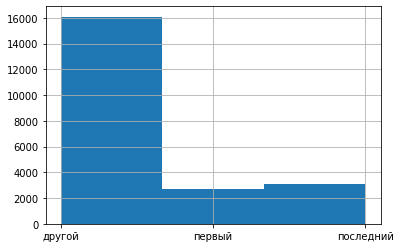

In [15]:
# Гистограмма для тип этажа квартиры («первый», «последний», «другой»)
data['floor_type'].hist(bins= 3)

Наибольшая часть недвижимости (74%) среди расмотренных объявлений находится не на первом и не на последнем этажах. Первый этаж встрчается в 12,3% объявлений, в то время как последний в 19%.

<AxesSubplot:>

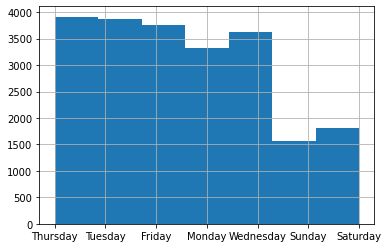

In [16]:
# Гистограмма для дня публикации объявления
data['day_name'].hist(bins =7)

Меньше всего объявлений было опубликовано в воскресенье (7%), больше всего в четверг (18%). Однако в будние дни только в понедельник меньше всего объявлений, в то время как в другие будни примерно одинакое значение.

<AxesSubplot:>

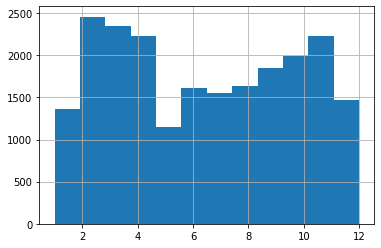

In [17]:
# Гистограмма для месяца публикации объявления
data['month'].hist(bins = 12)

Больше всего объявлений было опубликовано в феврале, на втором месте ноябрь. Меньше всего в мае и в январе (скорее всего из-за наличия большого кол-во выходных дней в этих месяцах)

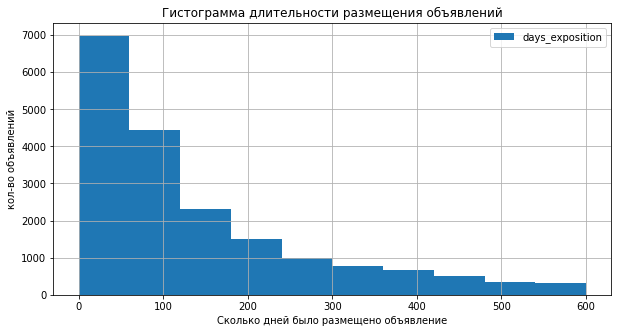

Средняя длительность размещений: 138
Медиана длительности размещений: 88
count    18845.000000
mean       137.941576
std        136.251751
min          1.000000
25%         42.000000
50%         88.000000
75%        192.000000
max        600.000000
Name: days_exposition, dtype: float64


In [18]:
###  Как быстро продавались квартиры
# Гистограмма для days_exposition
data.plot(y ='days_exposition', kind = 'hist', grid=True, figsize = (10,5),range = (0,600))
plt.ylabel('кол-во объявлений')
plt.xlabel('Сколько дней было размещено объявление')
plt.title('Гистограмма длительности размещения объявлений')
plt.show()
print('Средняя длительность размещений:',round(data['days_exposition'].mean()))
print('Медиана длительности размещений:',round(data['days_exposition'].median()))
print(data['days_exposition'].describe())

В среднем за рассмотренный период срок продажи занимал 138 дней, однако половина объявлений было закрыто за 88 дней. Быстрыми сделками считаюся сделки, которые закрылись менее чем за 42 дня (25% объявлениий). Долгий срок продаж начинается от 200 дней: при таком сроке стоит обратить внимание на качество объявления или на стоимость недвижимости.

In [19]:
### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

#выбираем нужные для анализа столбцы
factors = data[['last_price','price_per_metr','total_area','living_area','kitchen_area', 'rooms', 'floor_type', 'floor', 'month', 'year', 'day_name']]
print(display(factors.corr()))

,last_price,price_per_metr,total_area,living_area,kitchen_area,rooms,floor,month,year
last_price,1.000000,0.756192,0.723600,0.616014,0.542427,0.412707,0.074463,0.005120,-0.020120
price_per_metr,0.756192,1.000000,0.214982,0.120222,0.358535,-0.040287,0.175767,-0.004263,0.044596
total_area,0.723600,0.214982,1.000000,0.924458,0.556082,0.777502,-0.012699,0.007773,-0.054504
living_area,0.616014,0.120222,0.924458,1.000000,0.309863,0.864184,-0.102473,0.001191,-0.043768
kitchen_area,0.542427,0.358535,0.556082,0.309863,1.000000,0.163967,0.193055,0.008617,-0.031257
rooms,0.412707,-0.040287,0.777502,0.864184,0.163967,1.000000,-0.156644,-0.003281,-0.027520
floor,0.074463,0.175767,-0.012699,-0.102473,0.193055,-0.156644,1.000000,0.020641,-0.002968
month,0.005120,-0.004263,0.007773,0.001191,0.008617,-0.003281,0.020641,1.000000,-0.296123
year,-0.020120,0.044596,-0.054504,-0.043768,-0.031257,-0.027520,-0.002968,-0.296123,1.000000


None


Наибольшая прямая связь стоимости квартиры наблюдается с общей площадью квартиры (72%), жилой площадью (60%), размером кухни (50%) и кол-вом комнат (41%). Это значит, что при изменении этих факторов, стоимость жилья изменится в ту же сторону.

<AxesSubplot:xlabel='floor', ylabel='last_price'>

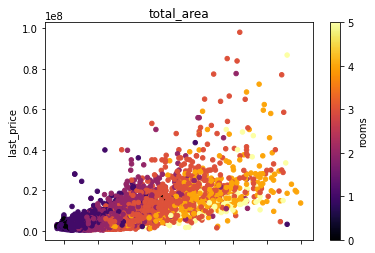

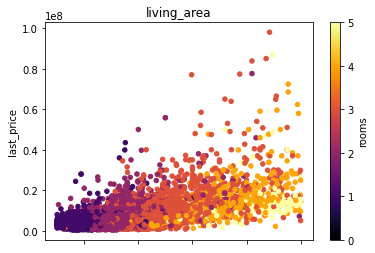

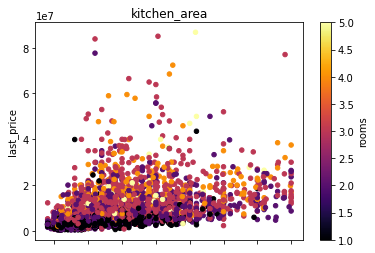

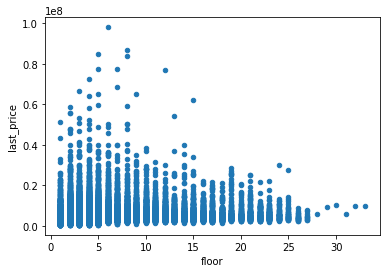

In [20]:
### Построим графики найденных зависимостей

# Зависимость цены от общей площади квартиры, а также кол-во комнат
factors.plot.scatter(x='total_area', y='last_price',c='rooms',colormap='inferno')
plt.title('total_area')

# Зависимость цены от жилой площади, а также кол-во комнат
factors.plot.scatter(x='living_area', y='last_price',c='rooms',colormap='inferno')
plt.title('living_area')

# Зависимость цены от площади кухни, а также кол-во комнат
factors.plot.scatter(x='kitchen_area', y='last_price',c='rooms',colormap='inferno')
plt.title('kitchen_area')

# Зависимость цены от этажа
factors.plot.scatter(x='floor', y='last_price')

Больше всего на цену влияют общаяя площадь квартиры и жилая площадь. Наблюдается также зависимость межлу кол-во комнат и жилой площадью (чем больше комнат, тем больше жилая и общие площади квартиры. Рассматривая взаимосвзяь этажей и стоимости жилья, видно, что чаще всего встречается наиболее дорогая недвижимость на 3-8 этажах.

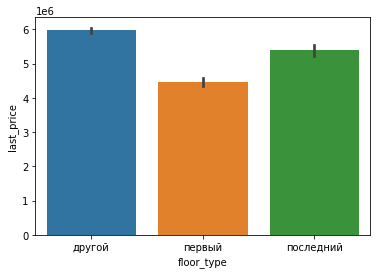

In [21]:
# Столбчатая диаграмма по типу этажа
sn.barplot(x=data['floor_type'],y = data['last_price']);
#sn.catplot(data=data, x="floor_type", kind="count");

Цена недвижимости находящийся на на других этажах, выше объявлений на первом и последнем этажах. Можно предположить, что квартиры на первом этаже пользуются меньшем спросом.

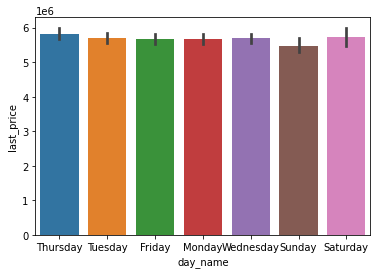

In [22]:
# Столбчатая диаграмма по дням недели
sn.barplot(x=data['day_name'],y = data['last_price']);
#sn.catplot(data=data, x="day_name", kind="count");

Зависимости между стоимостью квартир и днем недели публикации объявления не наблюдается.

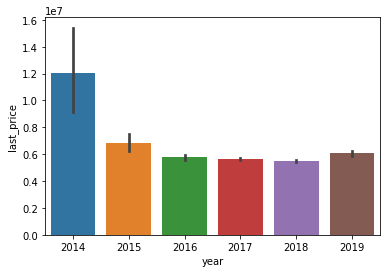

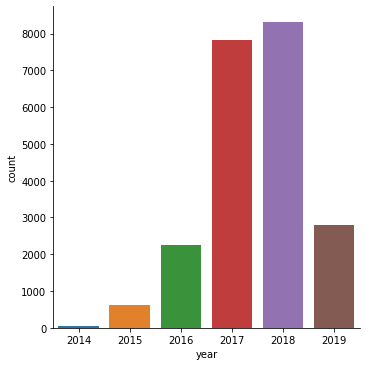

In [23]:
# Столбчатая диаграмма по году публикации 
sn.barplot(x=data['year'],y = data['last_price']);
sn.catplot(data=data, x="year", kind="count");

В 2014 году было очень мало объявлений, этим объясняется резкий скачок на диаграмме. В целом зависимости между стоимостью квартир и годом публикации объявления не наблюдается.

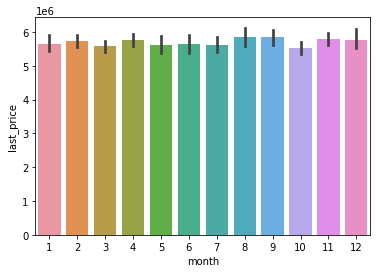

In [24]:
# Столбчатая диаграмма по месяцам публикации
sn.barplot(x=data['month'],y = data['last_price']);
#sn.catplot(data=data, x="month", kind="count");

Зависимости между стоимостью квартир и месяцем публикации объявления не наблюдается.

In [25]:
### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
grouped = data.pivot_table(index='locality_name', values='price_per_metr',aggfunc = ['median', 'count'])
grouped.columns=['median_price_per_metr','count']
grouped.sort_values(by = 'count', ascending = False, inplace = True)
grouped_table = grouped.head(10)
grouped_table

,median_price_per_metr,count
locality_name,,
Санкт-Петербург,104328.0,14345
поселок Мурино,85878.5,532
поселок Шушары,76829.0,423
Всеволожск,65737.5,376
Пушкин,99678.5,338
Колпино,74421.5,328
поселок Парголово,91429.0,317
Гатчина,67861.0,288
деревня Кудрово,92045.0,276


In [26]:
### Населённые пункты с самой высокой стоимостью квадратного метра
# grouped.sort_values(by = 'median_price_per_metr', ascending = False, inplace = True)
# grouped.head(3)

In [27]:
### Населённые пункты с самой низкой стоимостью квадратного метра
# grouped.sort_values(by = 'median_price_per_metr', ascending = True, inplace = True)
# grouped.head(3)

In [28]:
### Населённые пункты с самой высокой стоимостью квадратного метра
grouped_table.sort_values(by = 'median_price_per_metr', ascending = False)
grouped_table.head(3)

,median_price_per_metr,count
locality_name,,
Санкт-Петербург,104328.0,14345
поселок Мурино,85878.5,532
поселок Шушары,76829.0,423


In [29]:
### Населённые пункты с самой низкой стоимостью квадратного метра
grouped_table.sort_values(by = 'median_price_per_metr', ascending = True,inplace = True)
grouped_table.head(3)

/tmp/ipykernel_1043/1574631502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_table.sort_values(by = 'median_price_per_metr', ascending = True,inplace = True)


,median_price_per_metr,count
locality_name,,
Выборг,57895.0,223
Всеволожск,65737.5,376
Гатчина,67861.0,288


In [30]:
### Зависимость стоимости объектов от расстояния до центра города в Санкт-Петербурге
peter = data[data['locality_name']=='Санкт-Петербург'] # выбрали все объявления в Санкт-Петербурге
peter=peter.dropna(subset=['cityCenter']) #удаляем строки с пустыми cityCenter
peter = peter[~(peter['cityCenter']==0)] #убрали нули в cityCenter
peter['price_per_km'] = round(peter['last_price']/peter['cityCenter']) # цена за 1 км
print('Средняя цена каждого километра до центра в Санкт-Петербурге:', round(peter['price_per_km'].mean())) # средняя стоимость 1 км 

Средняя цена каждого километра до центра в Санкт-Петербурге: 965379


-0.34022138327383633
0.5607613890456796


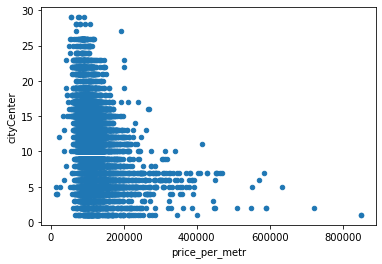

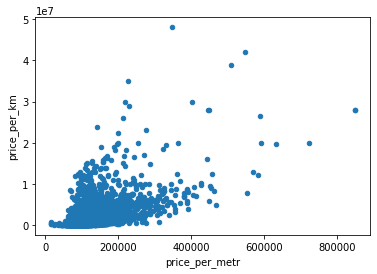

In [31]:
peter.plot.scatter(x='price_per_metr', y='cityCenter')
peter.plot.scatter(x='price_per_metr', y='price_per_km')
print(peter['price_per_metr'].corr(peter['cityCenter'])) # коэф корреляции между ценой за метр и растоянием до центра
print(peter['price_per_metr'].corr(peter['price_per_km'])) # коэф корреляции между ценой за метр и ценой за км 

Можно предположить, что между стоимостью квадратного метра квартиры и стоимостью километра от центра есть небольшая прямая зависимость. Чем выше стоимость квартиры, тем выше стоимость за км до центра, то есть чем ближе квартира к центру,тем дороже ее стоимость. Коэфициент корреляции 0,56.

<AxesSubplot:xlabel='cityCenter'>

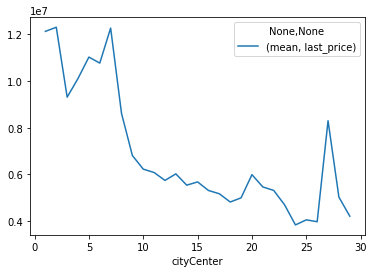

In [32]:
peter.pivot_table(index='cityCenter', values='last_price',aggfunc = ['mean']).plot()

Из графика видно, что в основном чем меньше километров до центра города, тем выше цена. Присутсвует небольшое отклонение между 25 и 30 км, однако общая тенеденция уменьшения стоимости недвижимости удаляясь от центра города сохраняется.

### Общий вывод

Перед началом исследования изучив структуру данных и список колонок, где были пропуски, были убраны и заменены пустые значения (8% строк датасета), убраны явные и неявные дубликаты, а также убраны выбросы и устранены аномалии в очевидных показателях. После обработки архива объявлений за 2014-2019 гола о продаже квартир в Санкт-Петербурге и соседних населённых пунктах осталось 21801 строка (вместо 23699).

Во время исследовательского анализа были построены гистограмы, а также расчитаны основные описательные сттистики по каждому, интересуещему нам показателю. Было выявлено следующее:
* Средняя площадь всех объявлений составила 32,4 квадратов.
* Чаще встречаются однокомнатные и двухкомнатные квартиры.
* Более распростарнена высота потолоков 2,5 и 2,7 метров.
* Основная часть недвижимости находится на 1-7 этажах.
* Первый этаж встрчается в 12,3% объявлений, в то время как последний в 19%.
* Расстояние до парков в среднем около 500 метров, до аэропорта — 20-30 км, до центра города — менее 13 км.
* Меньше всего объявлений было опубликовано в воскресенье (7%), больше всего в четверг (18%).
* Больше всего объявлений было опубликовано в феврале, меньше всего — в мае и в январе.
* Основная часть объявлений была закрыта за 138 дней.
* Больше всего на стоимость жилья влияет площадь квартиры (в том числе жилая площадь и плоащдь кухни) и кол-во комнат. Дальность от центра также влияет на стоимость, но слабее чем предыдущие факторы.
* Наиболее дорогая недвижимость находится на 3-8 этажах.
* Больше всего недвижимости продвалось в Санкт-Петерубурге, поселке Мурино и в поселке Шушары.
* Самую высокую стоимость за 1 квадратный метр среди топ-10 по кол-ву объявлений имеют населенные пункты: Санкт-Петерубург (104257,5 руб/м), поселок Мурино (85878,5 руб/м), поселок Шушары (76829,5 руб/м).
* Самую низкую стоимость за 1 квадратный метр среди топ-10 по кол-ву объявлений имеют населенные пункты: Выборг (57895 руб/м), Всеволжск (65737,5 руб/м), Гатчина (67861 руб/м).
* Чем дальше недвижимость от центра Санкт-Петербурга, тем выше ее стоимость.

В дальнейшем хотелось бы более глубоко изучить данные и взаимосвязи, но уже на актуальных данных. Сфера недвижимости меняется очень быстро, особенно в экономически нестабильной ситуации, в которой находится сейчас РФ, поэтому данные за 2014-2019 года уже устарели и опираться на них для каких-либо бизнес-решений нерелеватно.